Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading dataset

In [2]:
kn=pd.read_csv('Datasets/Social_Network.csv')

Performing EDA

In [3]:
kn.shape

(400, 5)

In [4]:
kn.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
kn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
# there is any categorical value
kn.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [7]:
#checking for null values
kn.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
#Describing the features
kn.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
#droping User ID column as it is not an important feature
kn.drop('User ID',axis=1,inplace=True)

In [10]:
kn.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [11]:
#converting categorical values to numerical
kn=pd.get_dummies(kn,drop_first=True)

In [12]:
kn.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [13]:
# seperating X and y
x=kn.loc[:,['Age','EstimatedSalary','Gender_Male']].values
y=kn.loc[:,['Purchased']].values

# Feature Scaling
Whenever we are dealing with KNN algorithm, we should do the feature scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc=StandardScaler()

In [16]:
x=sc.fit_transform(x)

In [17]:
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [19]:
#importing classification metrics
from sklearn.metrics import confusion_matrix,accuracy_score

In [20]:
from sklearn.neighbors import KNeighborsClassifier

Selecting the k value.

In [21]:
acc_list=[]
err_list=[]
for i in range(1,25):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_list.append(acc)
    err_list.append(1-acc)

<ipython-input-21-e997d26a9291>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train,y_train)
<ipython-input-21-e997d26a9291>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train,y_train)
<ipython-input-21-e997d26a9291>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train,y_train)
<ipython-input-21-e997d26a9291>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train,y_train)
<ipython-input-21-e997d26a9291>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

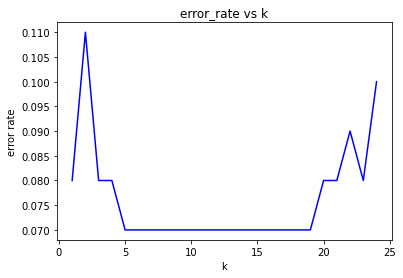

In [22]:
plt.plot(list(range(1,25)),err_list,c='b')
plt.title('error_rate vs k')
plt.xlabel('k')
plt.ylabel('error rate')
plt.show()

NOTE : from the above graph we can select k value as 5

Model building

In [23]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

<ipython-input-23-e4fb8223afca>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train,y_train)


Model Evaluation

In [24]:
confusion_matrix(y_test,y_pred)

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [25]:
accuracy_score(y_test,y_pred)

0.93